In [2]:
import pandas as pd

car_dataset = pd.read_csv("cars.csv")

In [3]:
car_dataset

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US


<Axes: xlabel='Weight', ylabel='Acceleration'>

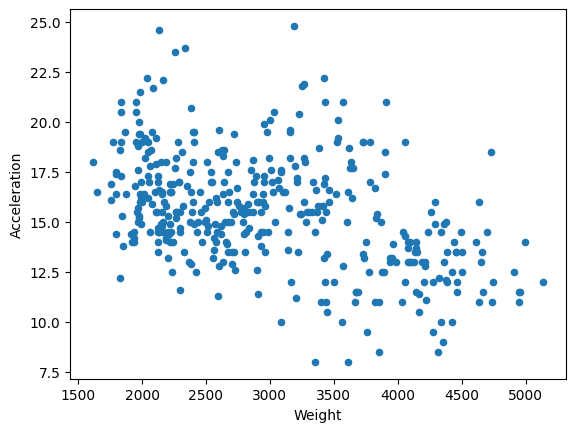

In [4]:
car_dataset.plot.scatter(x = 'Weight', y='Acceleration')

In [5]:
target = ["Horsepower"]

features = ["MPG", "Cylinders", "Weight", "Acceleration", "Model"]

all_selected = target + features

subset_data = car_dataset[all_selected] 

subset_data


,Horsepower,MPG,Cylinders,Weight,Acceleration,Model
0,130,18.0,8,3504,12.0,70
1,165,15.0,8,3693,11.5,70
2,150,18.0,8,3436,11.0,70
3,150,16.0,8,3433,12.0,70
4,140,17.0,8,3449,10.5,70
...,...,...,...,...,...,...
401,86,27.0,4,2790,15.6,82
402,52,44.0,4,2130,24.6,82
403,84,32.0,4,2295,11.6,82
404,79,28.0,4,2625,18.6,82


In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(subset_data, test_size=0.25)

In [7]:
train.shape

(304, 6)

In [8]:
test.shape

(102, 6)

In [9]:
train_x = train[features]
train_y = train[target].to_numpy()

test_x = test[features]
test_y = test[target].to_numpy()

In [10]:
train_y.shape

(304, 1)

In [11]:
train_x.shape

(304, 5)

In [12]:
test_y.shape

(102, 1)

In [13]:
test_x.shape

(102, 5)

In [14]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [15]:
LR_model.fit(train_x, train_y)

LinearRegression()

In [16]:
predictions_test = LR_model.predict(test_x)

In [17]:
print("First prediction: "+str(predictions_test[0]))
print("First target: "+str(test_y[0]))
print("Second prediction: "+str(predictions_test[1]))
print("Second target: "+str(test_y[1]))
print("Third prediction: "+str(predictions_test[2]))
print("Third target: "+str(test_y[2]))

First prediction: [78.91636443]
First target: [83]
Second prediction: [118.10733706]
Second target: [110]
Third prediction: [129.76507167]
Third target: [130]


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f'
      % mean_squared_error(test_y, predictions_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, predictions_test))

Mean squared error: 250.23
Coefficient of determination: 0.82
